<a href="https://colab.research.google.com/github/leocassiosilva/Analise-de-dados/blob/main/Analise_de_dados_de_homicidios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações

In [79]:
# Lib para modelagem de dados
import pandas as pd
import numpy as np
from google.colab import drive
# Libs para analise gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [35]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Analise dos dados

In [64]:
df = pd.read_csv('/content/drive/MyDrive/analise_dados/homicidios-homens-negros (2).csv', sep=";")
df = df.dropna()

In [65]:
df

,cod,nome,período,valor
0,51,MT,1996,0
1,26,PE,1996,0
2,35,SP,1996,335
3,33,RJ,1996,0
4,11,RO,1996,0
...,...,...,...,...
643,51,MT,2019,639
644,50,MS,2019,280
645,43,RS,2019,463
646,42,SC,2019,163


In [66]:
# Campos Nulos
df.isnull().sum()

cod        0
nome       0
período    0
valor      0
dtype: int64

In [67]:
# Analisar o tipo da informação
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 647
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cod      648 non-null    int64 
 1   nome     648 non-null    object
 2   período  648 non-null    int64 
 3   valor    648 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 25.3+ KB


In [68]:
# Analises Estatisticas
df.describe()

,cod,período,valor
count,648.000000,648.000000,648.000000
mean,29.111111,2007.500000,1064.566358
std,12.791032,6.927534,1275.160675
min,11.000000,1996.000000,0.000000
25%,17.000000,2001.750000,234.500000
50%,27.000000,2007.500000,543.000000
75%,41.000000,2013.250000,1309.000000
max,53.000000,2019.000000,6377.000000


In [71]:
#Seleciona as duas colunas período e valor
colunasSelecionadas = ['período','valor']


In [86]:
#Fazendo a filtragem das colunas selecionadas
Dados = df.filter(items=colunasSelecionadas)
Dados

,período,valor
0,1996,0
1,1996,0
2,1996,335
3,1996,0
4,1996,0
...,...,...
643,2019,639
644,2019,280
645,2019,463
646,2019,163


In [87]:
Dados = Dados.groupby('período')

In [88]:
Dados

In [89]:
Dados = Dados.sum()

In [90]:
Dados

,valor
período,
1996,335
1997,10147
1998,15247
1999,18203
2000,21895
2001,23657
2002,25246
2003,26753
2004,26191


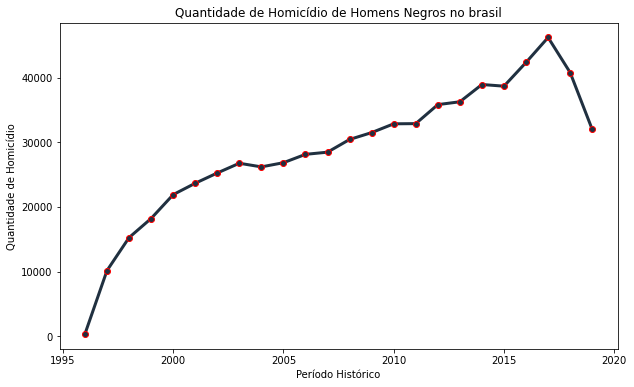

In [92]:
# --- Matplot - Linhas

# Tamanho da imagem
plt.figure( figsize=(10, 6) )

# Titulo
plt.title('Quantidade de Homicídio de Homens Negros no brasil')

# Labels
plt.xlabel('Período Histórico')
plt.ylabel('Quantidade de Homicídio')

plt.plot( Dados, color='#203040', linewidth=3, marker='o', markeredgecolor='red' );

In [93]:
#Seleciona as duas colunas nome/estado e valor
colunasSelecionadas = ['nome','valor']

In [94]:
#Fazendo a filtragem das colunas selecionadas
Dados_estado = df.filter(items=colunasSelecionadas)
Dados_estado

,nome,valor
0,MT,0
1,PE,0
2,SP,335
3,RJ,0
4,RO,0
...,...,...
643,MT,639
644,MS,280
645,RS,463
646,SC,163


In [95]:
Dados_estado = Dados_estado.groupby('nome')

In [96]:
Dados_estado = Dados_estado.sum()

In [97]:
Dados_estado

,valor
nome,
AC,2924
AL,25450
AM,17956
AP,4473
BA,75741
CE,34453
DF,12652
ES,20876
GO,28105


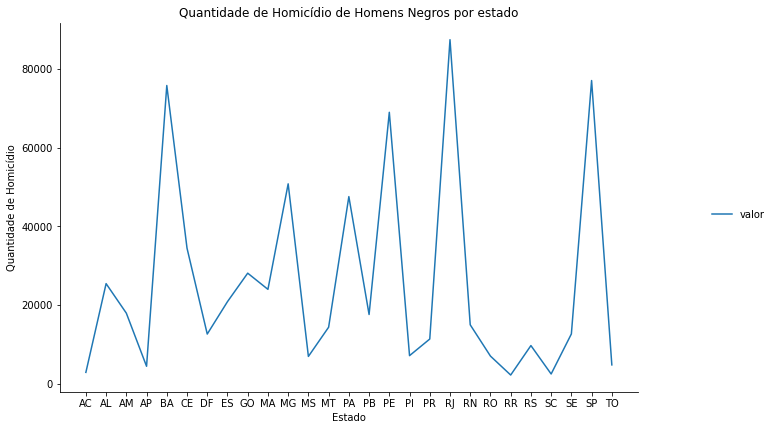

In [105]:
# --- Seaborn - Linhas
# Plot do Seabron de linhas
sns.relplot( data=Dados_estado, kind='line' )
# Titulo
plt.title('Quantidade de Homicídio de Homens Negros por estado')

# Labels
plt.xlabel('Estado')
plt.ylabel('Quantidade de Homicídio')
# Ajuste do Tamanho
plt.gcf().set_size_inches(12, 6)
